In [3]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import nilearn
%matplotlib inline

In [4]:
data = pd.read_csv('HCP_behavioural.csv')
data.describe()

,Subject,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_tMRI_PctCompl,fMRI_WM_PctCompl,fMRI_Gamb_PctCompl,fMRI_Mot_PctCompl,fMRI_Lang_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,...,1196.000000,1204.000000,1204.000000,1201.000000,1205.000000,1200.000000,1200.000000,1198.000000,1195.000000,1195.000000
mean,374551.585406,1.478441,1.400498,3.509950,87.213267,88.219569,89.718076,89.852736,89.631675,87.027114,...,4.404682,110.421321,97.727500,1.449625,45.847718,95.166983,93.998533,1.845467,0.581590,1.822251
std,272686.898230,0.635688,0.628216,1.215181,31.027886,29.942161,30.384864,30.163559,30.492092,33.566043,...,1.513823,9.107963,11.273251,1.783069,7.679288,14.583412,14.837851,0.541393,0.973172,0.542893
min,100004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.400000,82.740000,59.860000,0.000000,38.600000,56.350000,59.500000,1.560000,0.000000,1.080000
25%,154254.250000,1.000000,1.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,3.600000,101.120000,87.110000,0.000000,38.600000,84.070000,83.220000,1.800000,0.000000,1.760000
50%,212166.500000,2.000000,1.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,4.400000,108.790000,98.040000,1.000000,45.900000,95.360000,94.970000,1.800000,0.000000,1.800000
75%,586310.500000,2.000000,2.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,5.200000,122.250000,110.450000,2.000000,52.200000,105.570000,102.920000,1.880000,1.000000,1.840000
max,996782.000000,2.000000,2.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,14.000000,122.250000,111.410000,10.000000,75.300000,134.650000,131.380000,15.000000,17.000000,15.000000


In [5]:
data = data[data['NEO-FFI_Compl'] == True]
neo = ['Subject']
for col in data.columns:
    if (col[0:6] == 'NEOFAC'): neo.append(col)

data_neo = data[neo]
data_neo.describe()

,Subject,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,374908.650542,33.326105,28.202669,34.440367,16.799833,30.643036
std,272805.955931,5.821316,6.276580,5.929432,7.385066,5.965344
min,100004.000000,10.000000,9.000000,11.000000,0.000000,10.000000
25%,154481.500000,30.000000,24.000000,31.000000,12.000000,27.000000
50%,212217.000000,33.000000,28.000000,35.000000,16.000000,31.000000
75%,586161.000000,37.000000,32.000000,38.000000,21.000000,35.000000
max,996782.000000,48.000000,47.000000,48.000000,45.000000,47.000000


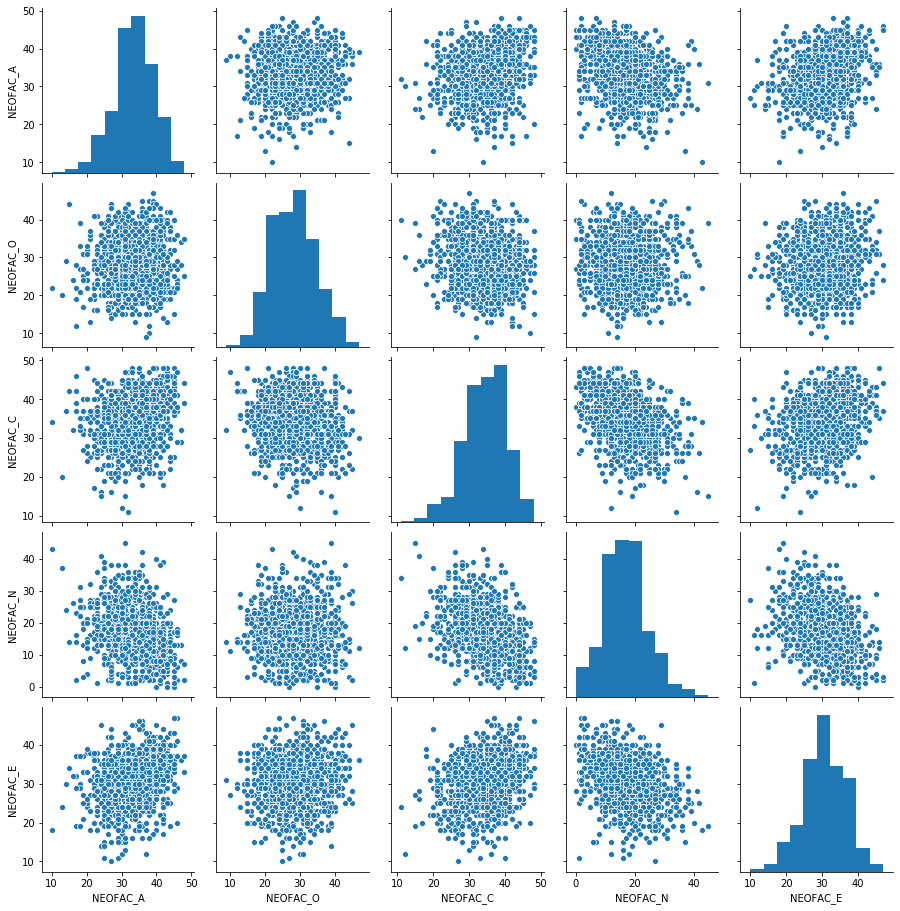

In [94]:
sns.pairplot(data_neo.drop('Subject', axis=1), kind ='scatter')

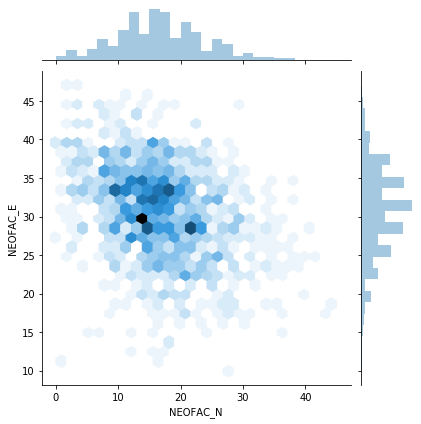

In [90]:
sns.jointplot(x = 'NEOFAC_N',y = 'NEOFAC_E', data = data_neo, kind = 'hex')

In [18]:
#filter to subjects I have downloaded 
#180129 highest neuroticism score 43
loc = []
subjects = [108828,114419,118932,130316,131722,151223,151526,156637,178950,201111,180129]
for sub in subjects:
    loc.append(data_neo.index[data_neo['Subject'] == sub].tolist()[0])

In [22]:
local_data = data_neo.loc[loc].sort_values(by = ['NEOFAC_N'])
local_data

,Subject,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E
78,114419,37.0,32.0,40.0,25.0,37.0
104,118932,33.0,34.0,29.0,25.0,21.0
165,130316,28.0,28.0,28.0,28.0,19.0
430,178950,30.0,27.0,36.0,28.0,18.0
284,151526,25.0,32.0,34.0,29.0,30.0
316,156637,30.0,31.0,32.0,30.0,17.0
544,201111,36.0,35.0,42.0,31.0,23.0
281,151223,27.0,18.0,30.0,33.0,28.0
51,108828,30.0,36.0,30.0,35.0,29.0
175,131722,42.0,37.0,28.0,39.0,25.0


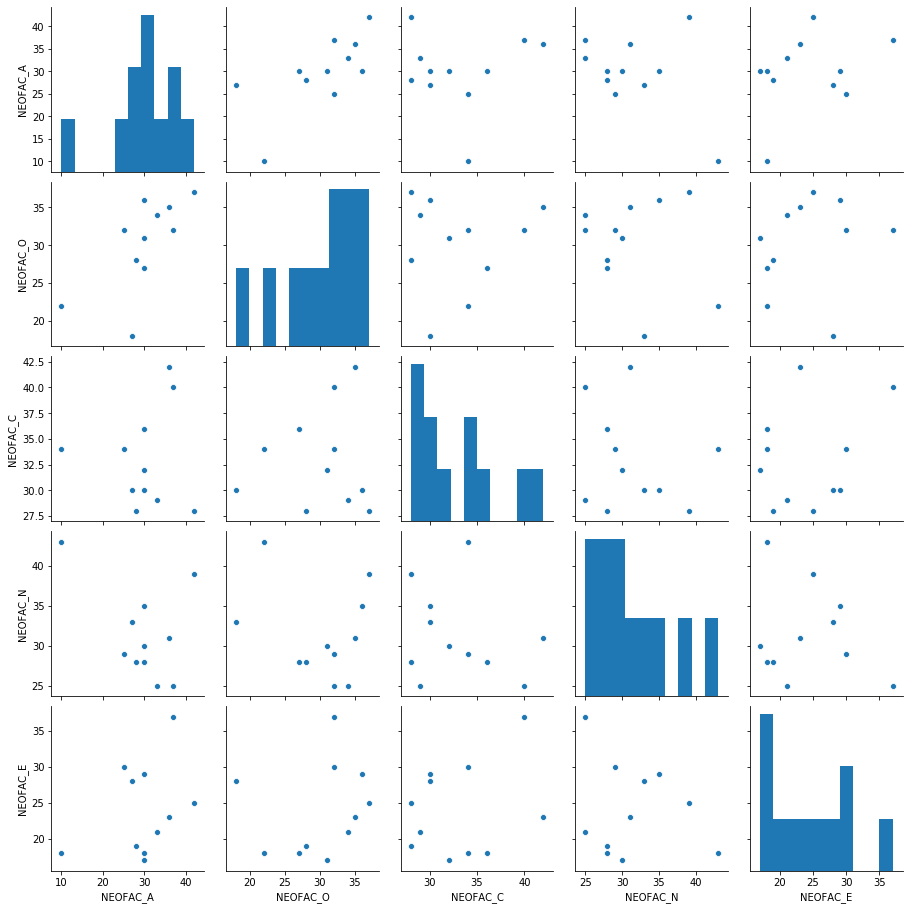

In [25]:
sns.pairplot(local_data.drop('Subject', axis=1))